In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Import and clean Football Data

In [4]:
nba_df = pd.read_csv('https://raw.githubusercontent.com/feliperodriguessd/Projetos/main/nba_game_scores_1g.csv')
display(nba_df)

,season,date,away.team,away.score,home.team,home.score,line,over_under
0,2015,2015-10-27,DET,106,ATL,94,-7.0,197.0
1,2015,2015-10-27,CLE,95,CHI,97,-4.0,198.5
2,2015,2015-10-27,NO,95,GS,111,-10.0,215.0
3,2015,2015-10-28,WSH,88,ORL,87,4.5,203.0
4,2015,2015-10-28,PHI,95,BOS,112,-11.5,198.0
...,...,...,...,...,...,...,...,...
1311,2015,2016-06-08,GS,90,CLE,120,-1.5,206.0
1312,2015,2016-06-10,GS,108,CLE,97,-2.5,206.5
1313,2015,2016-06-13,CLE,112,GS,97,-5.5,205.0
1314,2015,2016-06-16,GS,101,CLE,115,-2.0,207.5


In [6]:
ncaa_b_df = pd.read_csv('https://raw.githubusercontent.com/feliperodriguessd/Projetos/main/ncaab_game_scores_1g.csv')
display(ncaa_b_df)

,season,date,away.team,away.score,home.team,home.score,line,over_under
0,2015,2015-11-13,COLO,62,ISU,68,-10.0,151.0
1,2015,2015-11-13,SDAK,69,WRST,77,-6.5,136.0
2,2015,2015-11-13,WAG,57,SJU,66,-5.5,142.0
3,2015,2015-11-13,JVST,83,CMU,89,-18.0,142.5
4,2015,2015-11-13,NIAG,50,ODU,67,-18.0,132.0
...,...,...,...,...,...,...,...,...
4014,2015,2016-03-31,GW,76,VALP,60,-2.5,134.0
4015,2015,2016-04-01,MORE,82,NEV,85,-3.0,145.5
4016,2015,2016-04-02,NOVA,95,OKLA,51,2.0,144.0
4017,2015,2016-04-02,SYR,66,UNC,83,-9.5,145.0


Checking unique values on year of each dataset

In [8]:
print(nba_df['season'].unique())
print(ncaa_b_df['season'].unique())

[2015]
[2015]


In [10]:
common_years = pd.Series(nba_df['season'].unique())[pd.Series(nba_df['season'].unique()).isin(pd.Series(ncaa_b_df['season'].unique()))]


To compare just 2015 ill delete 2014 from the NFL dataset

In [14]:
nba_df_data_common = nba_df[nba_df['season'].isin(common_years)]
ncaa_b_df_data_common = ncaa_b_df[ncaa_b_df['season'].isin(common_years)]

In [15]:
print(nba_df_data_common.describe())
print(ncaa_b_df_data_common.describe())

       season   away.score   home.score         line   over_under
count  1316.0  1316.000000  1316.000000  1316.000000  1316.000000
mean   2015.0   100.971884   104.007599    -2.710486   204.595745
std       0.0    11.758921    11.680406     6.947834     9.107258
min    2015.0    68.000000    68.000000   -21.500000   104.000000
25%    2015.0    93.000000    96.000000    -7.500000   198.500000
50%    2015.0   101.000000   104.000000    -3.500000   204.500000
75%    2015.0   109.000000   112.000000     2.500000   210.000000
max    2015.0   147.000000   144.000000    17.000000   233.500000
       season   away.score   home.score         line   over_under
count  4019.0  4019.000000  4019.000000  4019.000000  4019.000000
mean   2015.0    69.865638    74.836775    -4.715601   143.866534
std       0.0    11.881816    12.096519     8.423424     9.973444
min    2015.0    33.000000    33.000000   -38.500000   114.000000
25%    2015.0    62.000000    67.000000   -10.000000   137.000000
50%    201

Analyse the relations and compare NFL vs NCAA

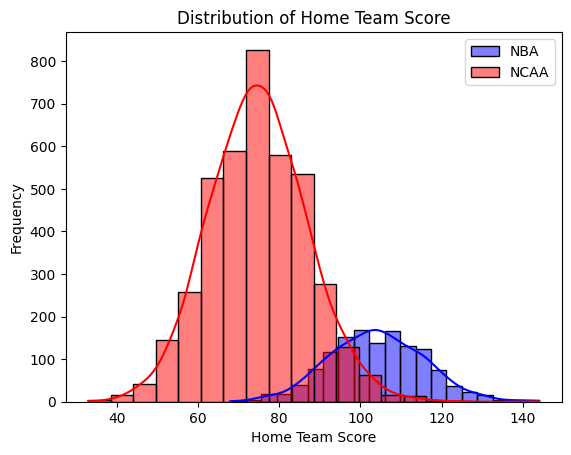

In [17]:
sns.histplot(nba_df_data_common['home.score'], bins=20, kde=True, color='blue', label='NBA')
sns.histplot(ncaa_b_df_data_common['home.score'], bins=20, kde=True, color='Red', label='NCAA')
plt.legend()
plt.xlabel('Home Team Score')
plt.ylabel('Frequency')
plt.title('Distribution of Home Team Score')
plt.show()

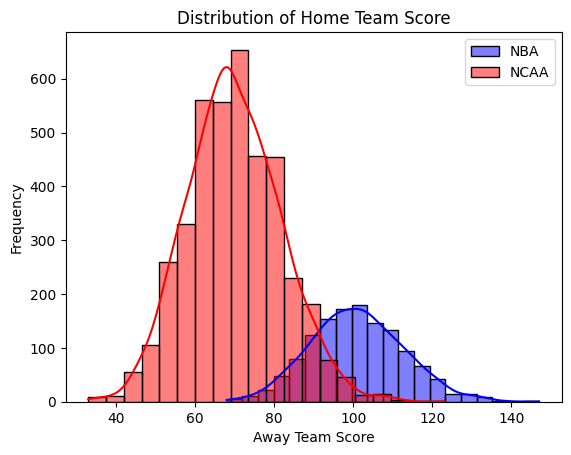

In [19]:
sns.histplot(nba_df_data_common['away.score'], bins=20, kde=True, color='blue', label='NBA')
sns.histplot(ncaa_b_df_data_common['away.score'], bins=20, kde=True, color='Red', label='NCAA')
plt.legend()
plt.xlabel('Away Team Score')
plt.ylabel('Frequency')
plt.title('Distribution of Home Team Score')
plt.show()

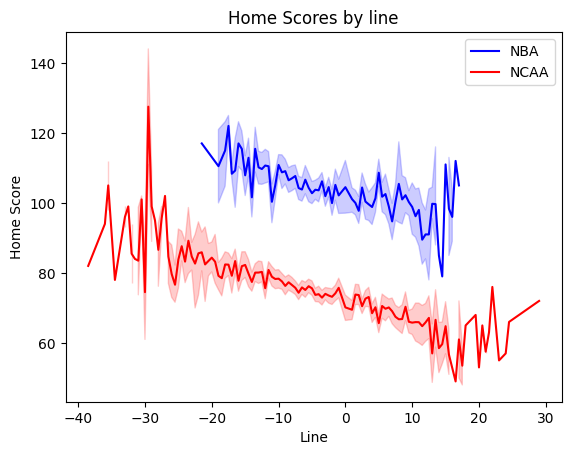

In [20]:
sns.lineplot(x='line', y='home.score', data=nba_df_data_common, color='blue', label='NBA')
sns.lineplot(x='line', y='home.score', data=ncaa_b_df_data_common, color='red', label='NCAA')

plt.legend()
plt.title('Home Scores by line')
plt.xlabel('Line')
plt.ylabel('Home Score')
plt.show()

Bivariate Analysis

In [22]:
correlation_matrix_nba = nba_df_data_common.corr()
correlation_matrix_ncaa = ncaa_b_df_data_common.corr()

C:\Users\458774\AppData\Local\Temp\ipykernel_18116\3854009422.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_nba = nba_df_data_common.corr()
C:\Users\458774\AppData\Local\Temp\ipykernel_18116\3854009422.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_ncaa = ncaa_b_df_data_common.corr()


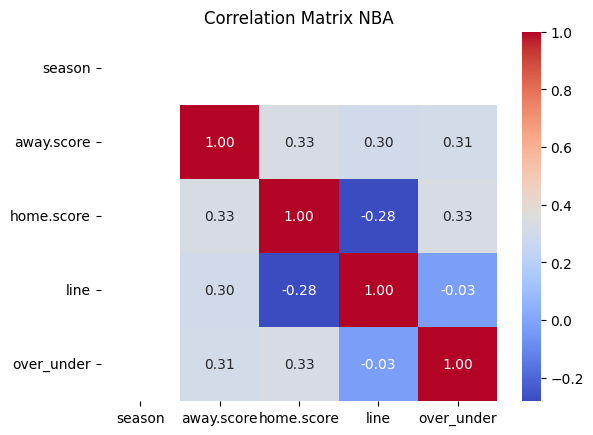

In [23]:
sns.heatmap(correlation_matrix_nba, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix NBA')
plt.show()

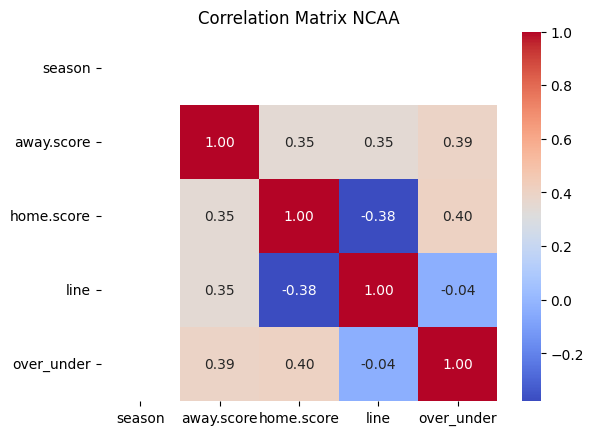

In [24]:
sns.heatmap(correlation_matrix_ncaa, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix NCAA')
plt.show()

Analysing Team Performance
    NCAA teams were selected the top 32 to be a metter comparision to the NFL teams
        Home score
        away score

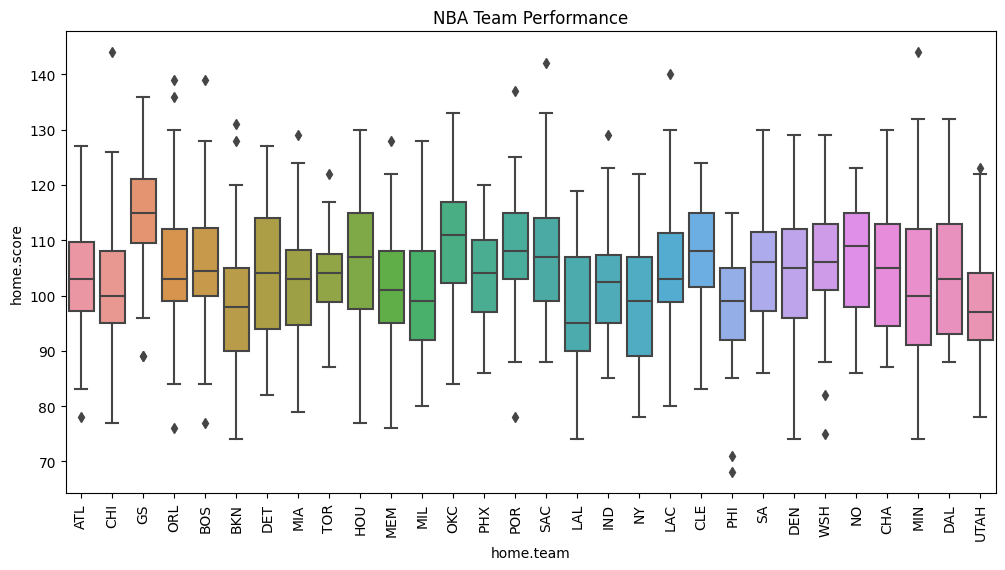

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='home.team', y='home.score', data=nba_df_data_common)
plt.title('NBA Team Performance')
plt.xticks(rotation=90)
plt.show()

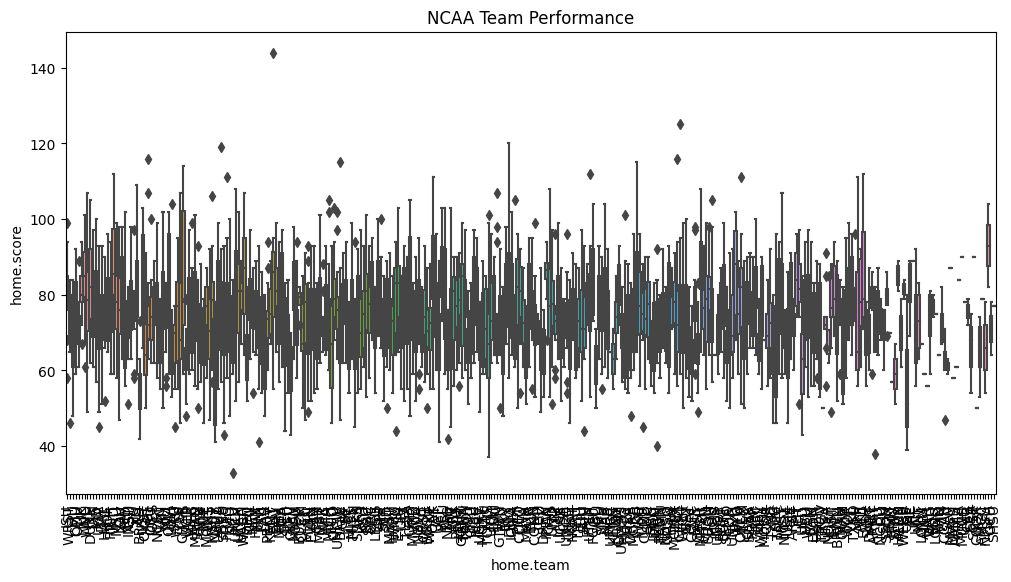

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='home.team', y='home.score', data=ncaa_b_df_data_common)
plt.title('NCAA Team Performance')
plt.xticks(rotation=90)
plt.show()

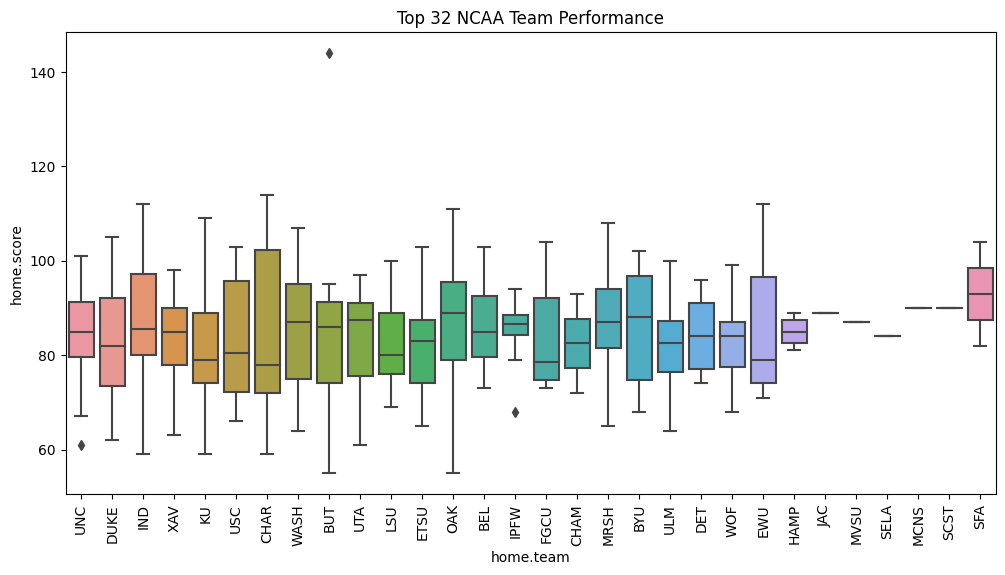

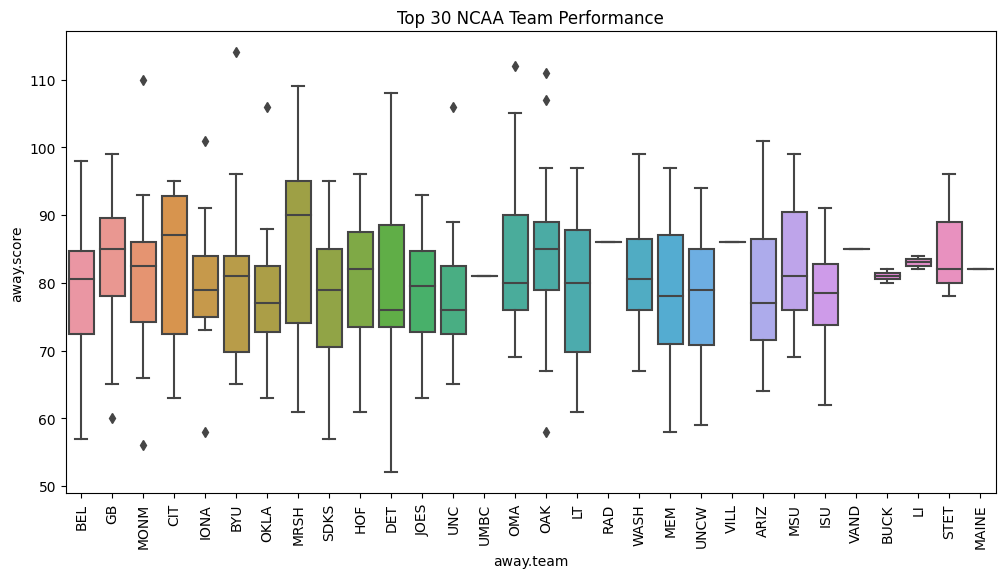

In [28]:
top_teams = ncaa_b_df_data_common.groupby('home.team')['home.score'].mean().sort_values(ascending=False).head(30).index

top_teams_data = ncaa_b_df_data_common[ncaa_b_df_data_common['home.team'].isin(top_teams)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='home.team', y='home.score', data=top_teams_data)
plt.title('Top 32 NCAA Team Performance')
plt.xticks(rotation=90)
plt.show()

top_teams = ncaa_b_df_data_common.groupby('away.team')['away.score'].mean().sort_values(ascending=False).head(30).index

top_teams_data = ncaa_b_df_data_common[ncaa_b_df_data_common['away.team'].isin(top_teams)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='away.team', y='away.score', data=top_teams_data)
plt.title('Top 30 NCAA Team Performance')
plt.xticks(rotation=90)
plt.show()

Date Analysis

In [29]:
# Convert the 'date' column to datetime format
nba_df_data_common['date'] = pd.to_datetime(nba_df_data_common['date'])
ncaa_b_df_data_common['date'] = pd.to_datetime(ncaa_b_df_data_common['date'])

# Extract and analyze trends in dates (monthly, yearly, etc.)
print("NBA Date Analysis:")
print(nba_df_data_common['date'].dt.month.value_counts())  # Example: Monthly analysis

print("\nNCAA Date Analysis:")
print(ncaa_b_df_data_common['date'].dt.month.value_counts())  # Example: Monthly analysis


NBA Date Analysis:
3     237
1     230
12    228
11    223
2     171
4     146
10     38
5      36
6       7
Name: date, dtype: int64

NCAA Date Analysis:
1     1104
2     1011
12     712
3      598
11     590
4        4
Name: date, dtype: int64


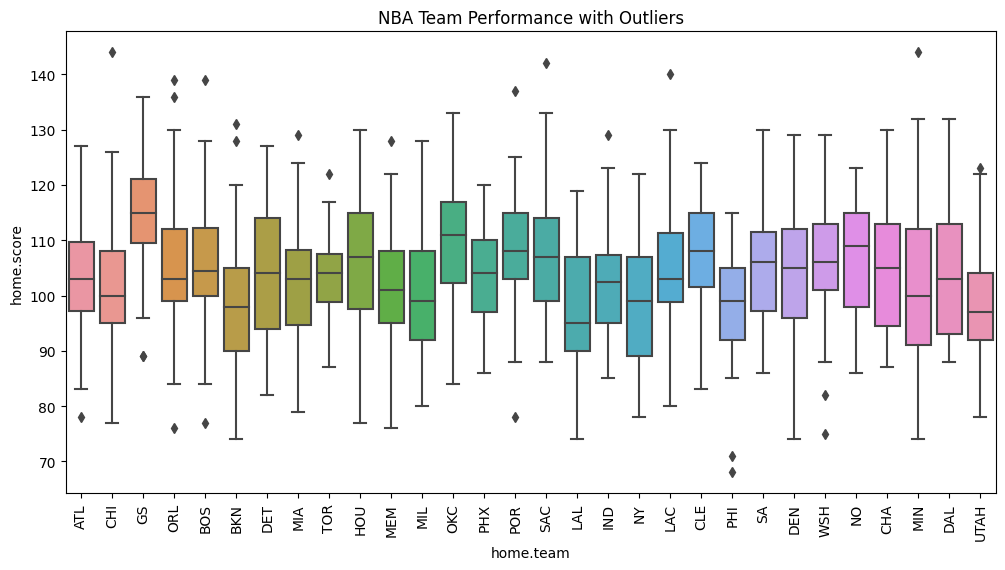

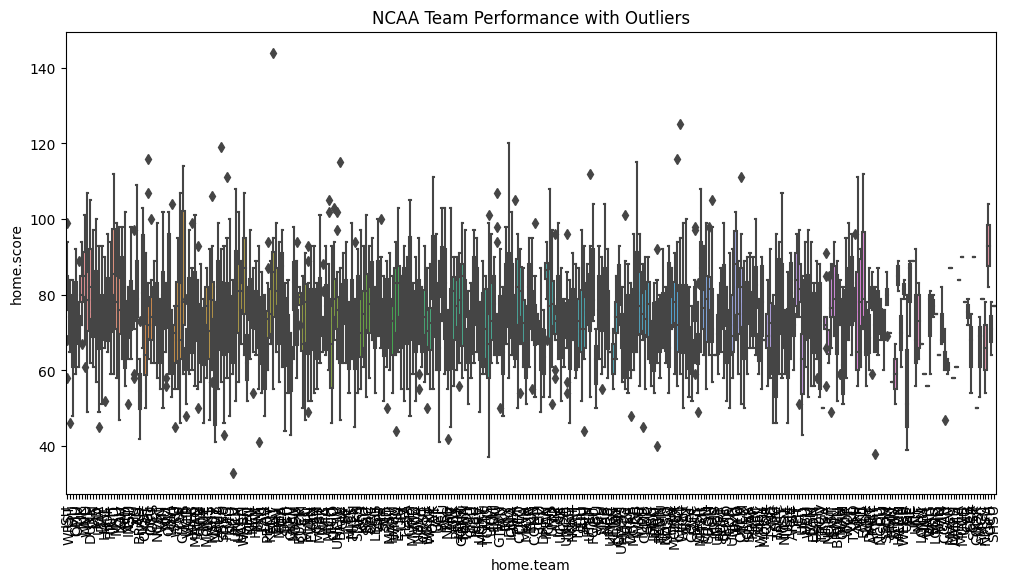

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='home.team', y='home.score', data=nba_df_data_common)
plt.title('NBA Team Performance with Outliers')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='home.team', y='home.score', data=ncaa_b_df_data_common)
plt.title('NCAA Team Performance with Outliers')
plt.xticks(rotation=90)
plt.show()